# DVA263 - Applied Machine Learning

### Exercise

This exercise involves the development of an Artificial Neural Network (ANN) that classifies handwritten digits from the MNIST dataset. The task will require preprocessing the data, constructing the network, and then training the model to recognize digit images.

<span style="color:red">Note:</span>
Please make sure that the system have following packages installed before doing the exercise.
* Numpy
* OpenCV
* Tensorflow
* Scipy
* Scikit-learn
* Matplotlib
* Seaborn

# *Libraries*

Libraries have already been declared. Please declare any additional libraries needed.

In [11]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scipy.ndimage import sobel
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# *Load the MNIST Dataset*

The MNIST dataset consists of 60,000 images for training and 10,000 images for testing, all of which contain handwritten digits.

In [12]:
# This function is to load the MNIST hand written digit dataset
# You do not need to change anything here

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return x_train, y_train, x_test, y_test

# *Plot First Ten Images*

Plotting images will help to understand the how each image looks like

In [13]:
# You do not need to change anything here.

def plot_first_ten_images(images, labels):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

# *Sobel Operator Edge Feature Extraction*

Edge detection from images is achieved through the utilization of the Sobel operator algorithm.

In [14]:
# This function takes images as input and extract edge features
# You do not need to change anything here.

def extract_edge_features(images):
    sobel_images = np.array([sobel(image, axis=-1) for image in images])
    return sobel_images

# *Data Preparation for Artificial Neural Networks*

Prepare the dataset for model training and testing.

In [15]:
def prepare_data(x_train, y_train, x_test, y_test): # Insert parameters name

    # Please perform follwoing tasks to prepare final data

    """ ------ Task 1 - Feature Extraction.----------
    # Instruction:
    #    - Call the "extract_edge_features()" function with "x_train" and "x_test" to extract edge features from the images.
    #    - Store the resulting edge features in "x_train_edges" and "x_test_edges".
    """
    # Write code here--
    # Extract edge features from the training and testing images
    x_train_edges = extract_edge_features(x_train)
    x_test_edges = extract_edge_features(x_test)



    """--------- Task 2 - Normalization. ------------
    # Instruction:
    #    - Normalize these edge features by scaling the pixel values to a range of [0, 1].
    #    - This is done by dividing by the maximum value of a pixel, which is 255.
    #    - Store the normalized data again in "x_train_edges" and "x_test_edges".
    """
    # Write code here--
    # Normalize the edge features by dividing by 255 to scale pixel values to [0, 1]
    x_train_edges = x_train_edges / 255.0
    x_test_edges = x_test_edges / 255.0



    """----------- Task 3 - Flattening.----------
    # Instruction:
    #    - Flatten the normalized edge feature images to create a one-dimensional array for each image.
    #    - This is necessary because the neural network expects a flat array of inputs.
    #    - Store the flattened data in "x_train_flat" and "x_test_flat".
    """
    # Write code here--
    # Flatten the edge feature images to 1D arrays (each image becomes a vector)
    x_train_flat = x_train_edges.reshape(x_train_edges.shape[0], -1)
    x_test_flat = x_test_edges.reshape(x_test_edges.shape[0], -1)



    """--------- Task 4 - One-Hot Encoding.-------------
    # Instruction:
    #    - Convert the categorical integer labels into a binary matrix representation using one-hot encoding.
    #    - This step is crucial for classification tasks to properly format the labels for the output layer of the network.
    #    - Store the one-hot encoding data in "y_train_encoded" and "y_test_encoded".
    """
    # Write code here--
     # Convert the labels to one-hot encoding
    y_train_encoded = to_categorical(y_train, 10)
    y_test_encoded = to_categorical(y_test, 10)


    """------------- Task 5 - After these preprocessing steps, the function will return four variables.-------
    # - "x_train_flat": the flattened training features
    # - "y_train_encoded": the one-hot encoded training labels
    # - "x_test_flat": the flattened testing features
    # - "y_test_encoded": the one-hot encoded testing labels
    """
    return x_train_flat, y_train_encoded, x_test_flat, y_test_encoded  # Insert the name of four variables as instruction to return


# *Build ANN Model*

Build the ANN model using hidden layers.

In [16]:
# Define your Neural Network Architecture inside the "build_model()" function.

"""----- Instructions --------
    - Use the Sequential model from Keras to stack layers in a linear format.
    - Start with a dense layer where input shape corresponding to the image data dimensions.
    - Use necessary activation fuction in each dense layer.
    - Continue adding dense layers reducing the number of neurons in each subsequent layer.
    - Apply L2 regularization if necessary to the layer to help prevent overfitting during training.
    - Add dropout after dense layers if necessary to further prevent overfitting during training.
    - Conclude with a dense layer with 10 neurons (one for each class) using the softmax activation function for multi-class classification.
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(input_shape):
    model = Sequential()

    # First hidden layer (input layer is automatically inferred from input shape)
    model.add(Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))  # Apply Dropout to help with overfitting

    # Second hidden layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))

    # Third hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))

    # Output layer (10 neurons for each class with Softmax activation for multi-class classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# *Compile and Train the Model*

Compile and traning the build model.

In [17]:
# Compile and train the model by using the "compile_and_train()" function.

"""------- Instructions --------
    - The function consits of three tasks where one is optional.
    - We appriciate if you perform the optional task.
    - Task 1 related to use of compile function. It has few hyperparametrs those are important
    - to configure the learning process of the model.
    - Task 2 related to use of fit function. It has few hyperparametrs those are important to train the model using dataset.
    - In the Task optional, "callbacks[]" used to perform actions such as saving the model weights,
    - logging training metrics, or stopping the training process early if the model is not improving.
"""

def compile_and_train(model, x_train, y_train, x_test, y_test):# Insert parameters name

    """------- Optional Task - Declare callbacks.----------
    Instruction:
        - Uncomment "callbacks[]" if it is necessary.
        - Use only "EarlyStopping()" or "ReduceLROnPlateau()" or both functions.
        - Write necessary hyperparameters inside the function.
    """
    # Write code here----
    # EarlyStopping stops training if the validation loss does not improve after a given patience (no improvement for 'n' epochs)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # ReduceLROnPlateau reduces the learning rate when the validation loss stops improving
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

    # List of callbacks
    callbacks = [early_stopping, reduce_lr]



    """ ----------- Task 1 - Compile Function. -------------
    Instruction:
        - Use compile function write all the necessary hyperparameters inside the complie function.
        - For example "model.compile()" where "model" already build using "build_model()" fucntion.
    """
    # Compile the model with the necessary hyperparameters
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



    """---------- Task 2 - Fit Function.------------
    Instruction:
        - Use fit function and write all the necessary hyperparameters inside the fit function.
        - For example "model.fit()" where "model" already build using "build_model()" fucntion.
        - Store the results after fitting the model in "history".
        - Don't forget to split the dataset for validation.
    """
    # Write code here----
     # Train the model using the fit function with the required parameters
    history = model.fit(x_train, y_train,
                        epochs=20,               # Number of epochs for training
                        batch_size=64,           # Batch size
                        validation_split=0.2,    # Split 20% of the training data for validation
                        callbacks=callbacks,     # Use the callbacks defined above
                        verbose=2)               # Print progress during training

    # Return the history object which contains training metrics
    return history  # Return "history" variable.

# *Plotting Training and Validation Figures*

Plot the training and validation loss and accuracy figures

In [18]:
# "plot_metrics()" function help to plot loss and accuracy figure of the training and validation.

def plot_metrics(history): # Insert parameter name

    # Plot traning and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot traning and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# *Evaluate the Model and Plot the Confusion Matrix*

In [19]:
# "evaluate_and_confusion_matrix()" function display the evalutaion result after training and testing the model.

def evaluate_and_confusion_matrix(model, x_train, y_train, x_test, y_test): # Insert parameters name

    # Predictions for the training set
    y_train_pred = model.predict(x_train)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)
    y_true_train = np.argmax(y_train, axis=1)

    # Predictions for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate and print the training and test accuracy
    train_accuracy = accuracy_score(y_true_train, y_train_pred_classes)
    test_accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Calculate and print the F1 score for the test set
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    print(f"Test F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# *Main Section*

The main section is responsible for calling all the functions, each of which has specific tasks to perform.

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


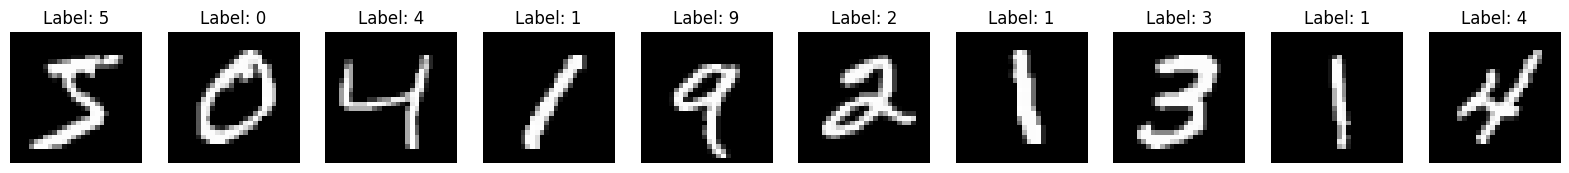

x_train_flat shape: (60000, 784)
y_train_encoded shape: (60000, 10)
x_test_flat shape: (10000, 784)
y_test_encoded shape: (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 - 6s - 8ms/step - accuracy: 0.6710 - loss: 1.2483 - val_accuracy: 0.8622 - val_loss: 0.6589 - learning_rate: 0.0010
Epoch 2/20
750/750 - 2s - 3ms/step - accuracy: 0.8209 - loss: 0.8124 - val_accuracy: 0.8812 - val_loss: 0.5809 - learning_rate: 0.0010
Epoch 3/20
750/750 - 2s - 3ms/step - accuracy: 0.8466 - loss: 0.7177 - val_accuracy: 0.8892 - val_loss: 0.5390 - learning_rate: 0.0010
Epoch 4/20
750/750 - 2s - 3ms/step - accuracy: 0.8619 - loss: 0.6621 - val_accuracy: 0.8930 - val_loss: 0.5205 - learning_rate: 0.0010
Epoch 5/20
750/750 - 3s - 4ms/step - accuracy: 0.8710 - loss: 0.6324 - val_accuracy: 0.8989 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 6/20
750/750 - 2s - 3ms/step - accuracy: 0.8746 - loss: 0.6071 - val_accuracy: 0.9023 - val_loss: 0.4907 - learning_rate: 0.0010
Epoch 7/20
750/750 - 3s - 4ms/step - accuracy: 0.8801 - loss: 0.5934 - val_accuracy: 0.9061 - val_loss: 0.4717 - learning_rate: 0.0010
Epoch 8/20
750/750 - 3s - 3ms/step - accuracy: 0.8826 -

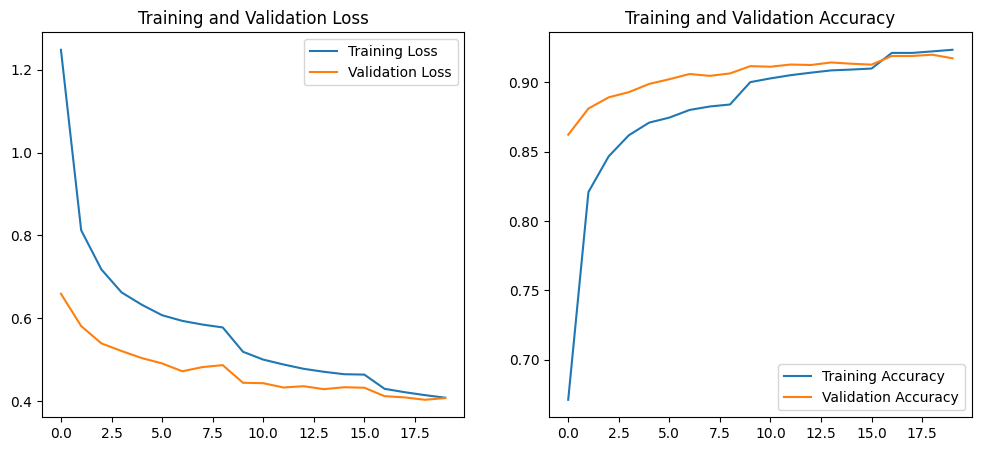

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train accuracy: 0.9560
Test accuracy: 0.9181
Test F1 Score: 0.9182


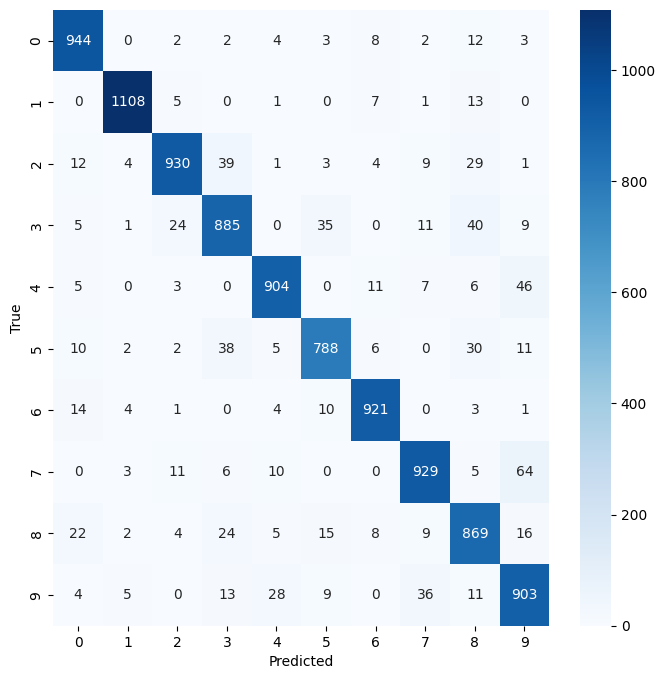

In [20]:
# --------------------------------------This is the main section------------------------------

"""------------Task 1: Dataset loading------------------------------

Instruction:
    Call the "load_data()" function to load the MNIST dataset.
    This function returns two tuples: one for the training data and another for the testing data.
    Each tuple contains a set of images and their corresponding labels.
    Store the images and labels in the following variables:
    x_train: training images
    y_train: training labels
    x_test: testing images
    y_test: testing labels
"""
# Write code here----
# Call the load_data() function to load the MNIST dataset
x_train, y_train, x_test, y_test = load_data()

# Optionally, check the shape of the data to verify it was loaded correctly
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")



"""------------- Task 2: First 10 Images Visualization--------------------------
Instruction:
    Call the "plot_first_ten_images()" function to display the first ten images from the dataset.
    This function takes two arguments:
        - 'images': a collection of image data, usually as an array where each element is an image.
        - 'labels': the corresponding labels for each image, indicating the class or category of the image.
    The function creates a 1x10 grid of subplots, where each subplot will display one of the first ten images
    in 'grayscale' and title it with its corresponding label.
"""
# Write code here----
# Call the plot_first_ten_images() function to display the first 10 images
plot_first_ten_images(x_train, y_train)





"""-----------  Task 3: Prepare Datset-----------------------------------------
Instruction:
    Call the "prepare_data()" function to perform preprocessing on the training and test datasets.
    This function will execute feature extraction, normalization, flattening, and one-hot encoding of labels.
    The output will be the prepared dataset, ready for training a neural network.
    You will receive four variables as a result:
        - "x_train_flat": Training data features, flattened for the neural network input.
        - "y_train_encoded": Training data labels, one-hot encoded.
        - "x_test_flat": Test data features, similarly flattened.
        - "y_test_encoded": Test data labels, one-hot encoded.
"""
# Write code here----
# Call the prepare_data() function to preprocess the dataset
x_train_flat, y_train_encoded, x_test_flat, y_test_encoded = prepare_data(x_train, y_train, x_test, y_test)

# Optionally, you can print the shapes of the resulting data to verify the preprocessing
print(f"x_train_flat shape: {x_train_flat.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"x_test_flat shape: {x_test_flat.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")





"""----------- Task 4: Build the model----------------------------------------
Instruction:
    Call the "build_model()" function to initialize your artificial neural network model.
    The model returned is ready to be compiled and trained with your dataset.
"""
# Write code here----
# Call the build_model() function to initialize the neural network model
model = build_model((x_train_flat.shape[1],))

# Optionally, you can print a summary of the model to see the layers and parameters
model.summary()




"""----------Task 5: Compile and Train-------------------------------------
Instruction:
    Call the "compile_and_train()" function to compile and train your neural network model.
    The function requires three arguments:
        - 'model': The ANN model you previously built with the "build_model()" function.
        - 'x_train_flat': The flattened feature data from your training set, prepared for neural network input.
        - 'y_train_encoded': The one-hot encoded labels from your training set.
    This function will first compile the model with the necessary configurations and then fit the model on the training data.
    The output "history" object will contain information about the training process, such as loss and accuracy for each epoch.
    Execute the following line of code to start the compilation and training process:
"""
# Write code here----
# Call the compile_and_train() function to compile and train the model
history = compile_and_train(model, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)





"""------------ Task 6: Plotting Training Metrics------------------------------
Instruction:
    Call the "plot_metrics()" function to visualize the training and validation metrics.
    Pass the 'history' object, which contains the training history of the model, as an argument to the function.
    This function will generate plots for both the loss and accuracy of the model during training.
    It helps to assess the model's performance and to identify if the model is overfitting or underfitting.
"""
# Write code here----
# Call the plot_metrics() function to visualize the training and validation metrics
plot_metrics(history)




"""---------- Task 7: Model Evaluation and Confusion Matrix Visualization-----
Instruction:
    Call the "evaluate_and_confusion_matrix()" function to evaluate the model's performance on both the training and testing data.
    This function will also plot the confusion matrix for the test data, providing insight into the model's classification accuracy across different classes.
    The function takes the following parameters:
        - 'model': The trained ANN model.
        - 'x_train_flat': The flattened training data features.
        - 'y_train_encoded': The one-hot encoded training data labels.
        - 'x_test_flat': The flattened testing data features.
        - 'y_test_encoded': The one-hot encoded testing data labels.
    After execution, the function will display the training and test accuracy and plot the confusion matrix.
"""
# Write code here----
# Call the evaluate_and_confusion_matrix() function to evaluate the model and plot the confusion matrix
evaluate_and_confusion_matrix(model, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

